In [1]:
import numpy as np
import pandas as pd
import main
las_data = pd.read_csv(main.csv_las_out_full_path, delimiter=';')
wells_list = np.unique(las_data['well_name'].values).tolist()
len(wells_list)

223

In [2]:
# загружаем wc
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'wc'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
water_content_data.head()
las_data = pd.merge(las_data, water_content_data, on=main.keys_dict[main.kid_well])
print(len(np.unique(las_data['well_name'].values).tolist()))
las_data.head()

167


,well_name,STRT,STOP,DEPT,aps,rp,kp,kgl,kpr,kvo,kng,lit,satur,UWI,date_start,wc
0,300,3114.0,3363.6,3114.0,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12
1,300,3114.0,3363.6,3114.1,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12
2,300,3114.0,3363.6,3114.2,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12
3,300,3114.0,3363.6,3114.3,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12
4,300,3114.0,3363.6,3114.4,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12


In [3]:
header_data = pd.read_csv(main.data_dir + "\\Well_Header.csv", delimiter='\t')
header_data.head()
header_data = header_data.rename(columns={'WellName': main.keys_dict[main.kid_well_dop_id]})
del header_data['KB']
del header_data['TopDepth']
del header_data['BottomDepth']
del header_data['Symbol']
del header_data['Rig']
del header_data['Field']
las_data = pd.merge(las_data, header_data, on='UWI')
print(len(np.unique(las_data['well_name'].values).tolist()))
las_data.head()

167


,well_name,STRT,STOP,DEPT,aps,rp,kp,kgl,kpr,kvo,kng,lit,satur,UWI,date_start,wc,X-Coord,Y-Coord
0,300,3114.0,3363.6,3114.0,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,353819.66,6464053.68
1,300,3114.0,3363.6,3114.1,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,353819.66,6464053.68
2,300,3114.0,3363.6,3114.2,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,353819.66,6464053.68
3,300,3114.0,3363.6,3114.3,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,353819.66,6464053.68
4,300,3114.0,3363.6,3114.4,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,353819.66,6464053.68


In [17]:
coord_data = las_data[['well_name', 'X-Coord', 'Y-Coord']]
coord_data = coord_data.drop_duplicates()
# coord_data = coord_data.reset_index()
print(coord_data.shape)
coord_data.head()

(167, 3)


,well_name,X-Coord,Y-Coord
0,300,353819.66,6464053.68
2497,301,353793.61,6464078.52
5048,302,353789.99,6464081.97
7337,304,353903.06,6463976.44
9592,306,353823.28,6464050.23


In [24]:
coord_data['X-Coord'] = coord_data['X-Coord'].astype('int64')
coord_data['Y-Coord'] = coord_data['Y-Coord'].astype('int64')
coord_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 341395
Data columns (total 3 columns):
well_name    167 non-null object
X-Coord      167 non-null int64
Y-Coord      167 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.2+ KB


In [25]:
x_arr = coord_data['X-Coord']
y_arr = coord_data['Y-Coord']

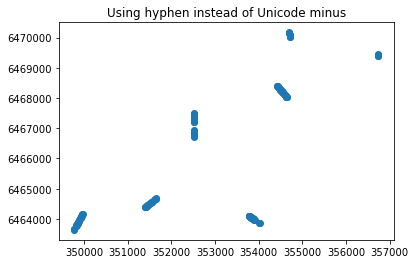

In [26]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(x_arr, y_arr, 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

In [28]:
min_x = np.min(x_arr)
min_y = np.min(y_arr)
max_x = np.max(x_arr)
max_y = np.max(y_arr)
h = 100

fake_x = []
fake_y = []

for x in range (min_x, max_x, h):
    for y in range (min_y, max_y, h):
        for idx, row in coord_data.iterrows():
            dist = np.sqrt((x - row['X-Coord'])*(x - row['X-Coord']) + (y - row['Y-Coord'])*(y - row['Y-Coord']))            
            if (dist <= 1000):
                fake_x.append(x)
                fake_y.append(y)
                break
            

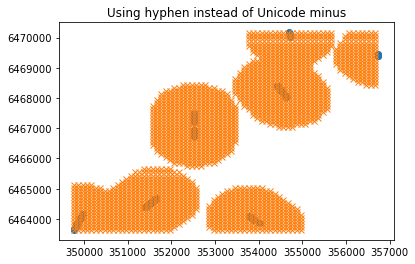

In [31]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(x_arr, y_arr, 'o')
ax.plot(fake_x, fake_y, 'x')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()